In [5]:
# preprocessing

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from IPython.display import display


def agnes(*, data=None, label=None, file='NoFileName.png'):
	X = data

	print('Dataset: {}'.format(label))

	linkage_methods = ['single', 'complete', 'average', 'centroid', 'ward']

	rows = len(linkage_methods) // 2
	if len(linkage_methods) % 2 == 0:
		columns = len(linkage_methods) // 2
	else:
		columns = len(linkage_methods) // 2 + 1

	fig, ax = plt.subplots(rows, columns)

	row = rows - 1
	column = columns - 1
	ax[row, column].set_title('Scatter Plot', fontsize=8)
	size = len(X) * [200]
	ax[row, column].scatter(X[:, 0], X[:, 1], marker='o', s=size, label=label)
	for i, txt in enumerate(label):
		# ax[row, column].annotate(txt, (X[i, 0] + .4, X[i, 1] + .2), fontsize=12)
		ax[row, column].annotate(txt, (X[i, 0]- .3 , X[i, 1]-.1), fontsize=12, c='white')
	ax[row, column].set_xticks(np.arange(0, max(X[:, 0]) + 2, 1))
	ax[row, column].set_yticks(np.arange(0, max(X[:, 1]) + 2, 1))
	ax[row, column].tick_params(axis='both', which='major', labelsize=8)
	ax[row, column].tick_params(axis='both', which='minor', labelsize=6)

	row = 0
	column = 0
	for n, linkage_method in enumerate(linkage_methods):
		Z = linkage(X, linkage_method)
		ax[row, column].set_title('{}'.format(linkage_method), fontsize=8)
		ax[row, column].set_yticks(np.arange(0, np.amax(Z) + 2, .5))
		ax[row, column].tick_params(axis='both', which='major', labelsize=8)
		ax[row, column].tick_params(axis='both', which='minor', labelsize=6)
		dendrogram(Z,
				   ax=ax[row, column],
				   truncate_mode='level',
				   p=len(X),
				   get_leaves=True,
				   leaf_font_size=6,
				   labels=label)
		if n % 2 == 0:
			row += 1
		else:
			column += 1
			row = 0
	plt.show()
	fig.savefig(file)

A = [2, 2]
B = [4, 2]
C = [6, 2]
D = [8, 2]
E = [10, 2]
F = [3, 3]

Plotting
Dataset: ['A' 'B' 'C']


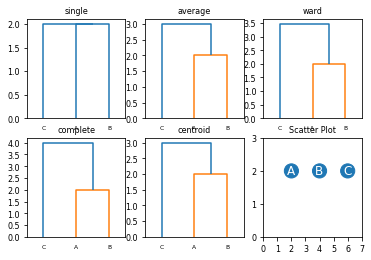

In [2]:

print("Plotting")
%matplotlib inline

X = np.array((A, B, C))
label = np.array(("A", "B", "C"))
agnes(data=X, label=label, file="case1.png")

Dataset: ['A' 'B' 'D' 'E']


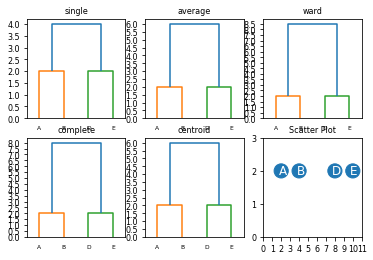

In [3]:
X = np.array((A, B, D, E))
label = np.array(("A", "B", "D", "E"))
agnes(data=X, label=label, file="case2.png")

Dataset: ['A' 'B' 'F']


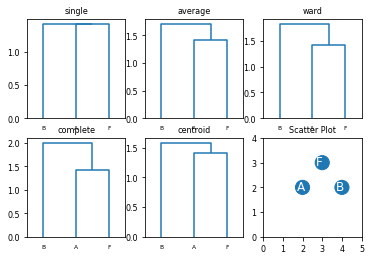

In [4]:
X = np.array((A, B, F))
label = np.array(("A", "B", "F"))
agnes(data=X, label=label, file="case3.png")
